<h2>Comp III Final Project - Census Group
<br>Grafman<br>Visualizing Census Data</h2>


HRYEAR4 - 4 - YEAR OF INTERVIEW
GESTFIPS		2		FEDERAL INFORMATION 									93 - 94
                         		PROCESSING STANDARDS 
					(FIPS) STATE CODE

					EDITED UNIVERSE:	ALL HHLD's IN SAMPLE

					VALID ENTRIES

					01	AL		30	MT
					02	AK		31	NE
					04	AZ		32	NV
					05	AR		33	NH
					06	CA		34	NJ
					08	CO		35	NM
					09	CT		36	NY
					10	DE		37	NC
					11	DC		38	ND
					12	FL		39	OH
					13	GA		40	OK
					15	HI		41	OR
					16	ID		42	PA
					17	IL		44	RI
					18	IN		45	SC
					19	IA		46	SD
					20	KS		47	TN
					21	KY		48	TX
					22	LA		49	UT
					23	ME		50	VT
					24	MD		51	VA
					25	MA		53	WA
					26	MI		54	WV
					27	MN		55	WI
					28	MS		56	WY
					29	MO
	
                    
    PEAFEVER		2		DID YOU EVER SERVE ON ACTIVE 								131 - 132
					DUTY IN THE U.S. ARMED FORCES?			
	
					EDITED UNIVERSE:	PRTAGE >=17

					VALID ENTRIES

					1	YES
					2	NO

FILLER			2		Starting August 2005									133 - 134
						 
PEAFNOW			2		ARE YOU NOW IN THE ARMED FORCES 							135 - 136

					EDITED UNIVERSE:	PRPERTYP = 2 or 3

					VALID ENTRIES

					1	YES
					2	NO

In [1]:
#!pip install pandas

In [2]:
#!pip install matplotlib

In [3]:
#!pip install geopandas

In [4]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import geopandas as gpd
import glob

#moving from home directory to project directory
os.chdir('/data/OA3802g1/census') 

In [5]:
#initializing empty master dataframes
df_21 = pd.DataFrame()
df_22 = pd.DataFrame()
df_23 = pd.DataFrame()


#looping over every file in folder that ends in "23pub.csv" 
#this will pull every census csv from 2023
for file in glob.glob('*23pub.csv'):
    #read each csv into a temporary df
    temp_df = pd.read_csv(file)
    
    #change column names to all lowercase for ease of merging
    temp_df.columns = temp_df.columns.str.lower()

    #trimming df to only columns of interest
    temp_df = temp_df[['gereg','gediv','gestfips','prtage','peafever','peafnow']]

    #concat df with the previous ones
    df_23 = pd.concat([df_23,temp_df],ignore_index=True)

#repeat for each year the csv is available, now 2022
for file in glob.glob('*22pub.csv'):
    #read each csv into df
    temp_df = pd.read_csv(file)
    
    #change column names to all lowercase for ease of merging
    temp_df.columns = temp_df.columns.str.lower()

    #trimming the df to only columns of interest
    temp_df = temp_df[['gereg','gediv','gestfips','prtage','peafever','peafnow']]
    
    #concat df with the previous ones
    df_22 = pd.concat([df_22,temp_df],ignore_index=True)


for file in glob.glob('*21pub.csv'):
    #read each csv into df
    temp_df = pd.read_csv(file)
    
    #change column names to all lowercase for ease of merging
    temp_df.columns = temp_df.columns.str.lower()

    #trimming the df to only columns of interest
    temp_df = temp_df[['gereg','gediv','gestfips','prtage','peafever','peafnow']]
    
    #concat df with the previous ones
    df_21 = pd.concat([df_21,temp_df],ignore_index=True)


#display headers to observe expected df
print(df_23)
print(df_22)
print(df_21)

         gereg  gediv  gestfips  prtage  peafever  peafnow
0            3      6         1     NaN       NaN      NaN
1            3      6         1    65.0       2.0      2.0
2            3      6         1     NaN       NaN      NaN
3            3      6         1    67.0       2.0      2.0
4            3      6         1     NaN       NaN      NaN
...        ...    ...       ...     ...       ...      ...
1267016      4      8        56     NaN       NaN      NaN
1267017      4      8        56     NaN       NaN      NaN
1267018      4      8        56     NaN       NaN      NaN
1267019      4      8        56     NaN       NaN      NaN
1267020      4      8        56     NaN       NaN      NaN

[1267021 rows x 6 columns]
         gereg  gediv  gestfips  prtage  peafever  peafnow
0            3      6         1    57.0       1.0      2.0
1            3      6         1    56.0       2.0      2.0
2            3      6         1    24.0       2.0      2.0
3            3      6       

In [6]:
#removing all the entries of people who have never been in the military
    #temp_df = temp_df[temp_df['peafever']==1]
#df_21[df_21['peafnow']==1]

In [7]:
#creating 3 df for active duty
ad_23 = df_23[df_23['peafnow']==1]
ad_22 = df_22[df_22['peafnow']==1]
ad_21 = df_21[df_21['peafnow']==1]

#building df for veterans
vet_23 = df_23[df_23['peafever']==1]
vet_22 = df_22[df_22['peafever']==1]
vet_21 = df_21[df_21['peafever']==1]

In [8]:
#df_23[df_23['peafever']==1]

In [9]:
#aggregating by # ppl in each state
state_vet_23 = vet_23.groupby('gestfips').size().reset_index(name='count')
state_vet_22 = vet_22.groupby('gestfips').size().reset_index(name='count')
state_vet_21 = vet_21.groupby('gestfips').size().reset_index(name='count')

state_ad_23 = ad_23.groupby('gestfips').size().reset_index(name='count')
state_ad_22 = ad_22.groupby('gestfips').size().reset_index(name='count')
state_ad_21 = ad_21.groupby('gestfips').size().reset_index(name='count')

state_ad_23.head()

,gestfips,count
0,1,42
1,2,208
2,4,44
3,5,38
4,6,203


In [10]:
#list of state abbreviations in the order they appear as gestfips numbers
gestfips_names = ['AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY',
                  'NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']

#assign abbreviations to each df as STUSPS column
state_vet_23['STUSPS'] = gestfips_names
state_vet_22['STUSPS'] = gestfips_names
state_vet_21['STUSPS'] = gestfips_names

state_ad_23['STUSPS'] = gestfips_names
state_ad_22['STUSPS'] = gestfips_names
state_ad_21['STUSPS'] = gestfips_names
state_vet_23.head()

,gestfips,count,STUSPS
0,1,1472,AL
1,2,968,AK
2,4,990,AZ
3,5,1300,AR
4,6,2921,CA


In [11]:
#getting total number and calculating the percentage in each state
vet_number_23 = state_vet_23['count'].sum()
vet_number_22 = state_vet_22['count'].sum()
vet_number_21 = state_vet_21['count'].sum()

ad_number_23 = state_ad_23['count'].sum()
ad_number_22 = state_ad_22['count'].sum()
ad_number_21 = state_ad_21['count'].sum()

#creating new percentage column = count/total number of responses
#multiplying by 100 this gives us the percentage of respondants from that state
state_vet_23['percentage'] = (state_vet_23['count'] / vet_number_23)*100
state_vet_22['percentage'] = (state_vet_22['count'] / vet_number_22)*100
state_vet_21['percentage'] = (state_vet_21['count'] / vet_number_21)*100

state_ad_23['percentage'] = (state_ad_23['count'] / ad_number_23)*100
state_ad_22['percentage'] = (state_ad_22['count'] / ad_number_22)*100
state_ad_21['percentage'] = (state_ad_21['count'] / ad_number_21)*100

In [12]:
#sanity checking the percentages add to about 100 and the total number we're dividing by is the number of rows we expect it to be
perc_check = state_vet_23['percentage'].sum()
num_chec = state_vet_23['count'].sum()
print(perc_check, num_chec)

perc_check = state_vet_22['percentage'].sum()
num_chec = state_vet_22['count'].sum()
print(perc_check, num_chec)

perc_check = state_vet_21['percentage'].sum()
num_chec = state_vet_21['count'].sum()
print(perc_check, num_chec)

#ad
perc_check = state_ad_23['percentage'].sum()
num_chec = state_ad_23['count'].sum()
print(perc_check, num_chec)

perc_check = state_ad_22['percentage'].sum()
num_chec = state_ad_22['count'].sum()
print(perc_check, num_chec)

perc_check = state_ad_21['percentage'].sum()
num_chec = state_ad_21['count'].sum()
print(perc_check, num_chec)

99.99999999999999 57334
99.99999999999999 71788
100.0 76191
100.0 3160
99.99999999999999 4013
100.0 4408


In [13]:
#read in census state shapefile save as geodataframe, only keep the relevant columns
states = gpd.read_file('cb_2018_us_state_5m.shp')
states = states[['STUSPS','NAME','geometry']]
states.head()

,STUSPS,NAME,geometry
0,NE,Nebraska,"POLYGON ((-104.05351 41.15726, -104.05267 41.2..."
1,WA,Washington,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217..."
2,NM,New Mexico,"POLYGON ((-109.05017 31.48000, -109.04984 31.4..."
3,SD,South Dakota,"POLYGON ((-104.05770 44.99743, -104.05021 44.9..."
4,TX,Texas,"POLYGON ((-106.64548 31.89867, -106.64084 31.9..."


In [14]:
#merging the geometry data from the states gdf with the census data from each year
vet_geo_23 = state_vet_23.merge(states, on='STUSPS')
vet_geo_22 = state_vet_22.merge(states, on='STUSPS')
vet_geo_21 = state_vet_21.merge(states, on='STUSPS')

ad_geo_23 = state_ad_23.merge(states, on='STUSPS')
ad_geo_22 = state_ad_22.merge(states, on='STUSPS')
ad_geo_21 = state_ad_21.merge(states, on='STUSPS')

In [15]:
# Re-defining dataset as a geo-df for ease of mapping and manipulation
vet_geo_23 = gpd.GeoDataFrame(vet_geo_23, geometry=vet_geo_23['geometry'])
vet_geo_22 = gpd.GeoDataFrame(vet_geo_22, geometry=vet_geo_22['geometry'])
vet_geo_21 = gpd.GeoDataFrame(vet_geo_21, geometry=vet_geo_21['geometry'])

ad_geo_23 = gpd.GeoDataFrame(ad_geo_23, geometry=ad_geo_23['geometry'])
ad_geo_22 = gpd.GeoDataFrame(ad_geo_22, geometry=ad_geo_22['geometry'])
ad_geo_21 = gpd.GeoDataFrame(ad_geo_21, geometry=ad_geo_21['geometry'])

#exclude OCONUS for ease of viewing heatmap
oconus = ['AK', 'HI']
vet_geo_23_conus = vet_geo_23.query('STUSPS not in @oconus')
vet_geo_22_conus = vet_geo_22.query('STUSPS not in @oconus')
vet_geo_21_conus = vet_geo_21.query('STUSPS not in @oconus')

ad_geo_23_conus = ad_geo_23.query('STUSPS not in @oconus')
ad_geo_22_conus = ad_geo_22.query('STUSPS not in @oconus')
ad_geo_21_conus = ad_geo_21.query('STUSPS not in @oconus')

/tmp/ipykernel_31387/2597250216.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(vet_geo_23_conus.geometry.centroid.x, vet_geo_23_conus.geometry.centroid.y, vet_geo_23_conus['percentage']):


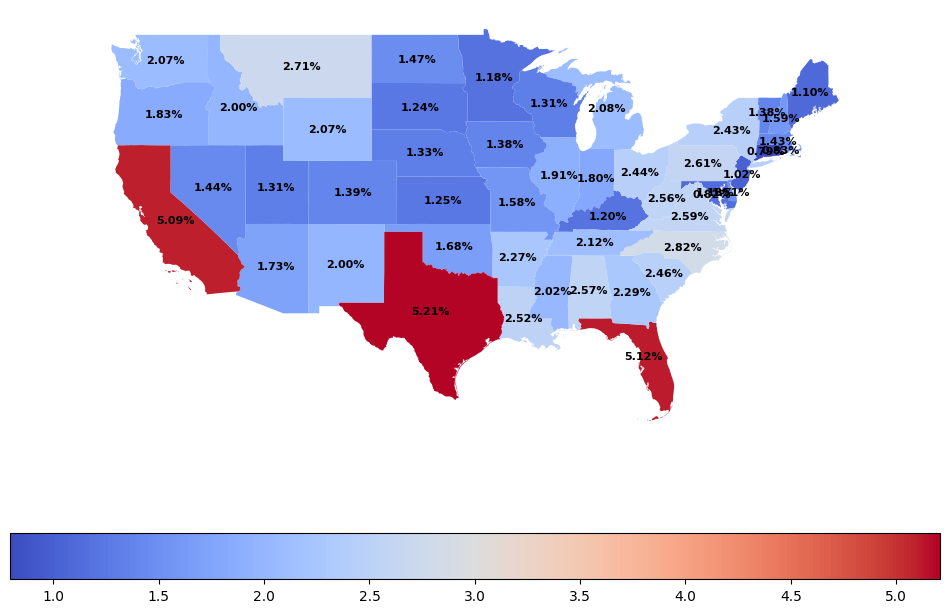

In [16]:
#2023 vet
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
#plot map
plot = vet_geo_23_conus.plot(column='percentage', cmap='coolwarm', legend=True, legend_kwds={'orientation': 'horizontal'}, ax=ax)

#add percentage values to show the source of the states color
#zip iterates over the centroid coordinates of the states and their corresponding percentage values, and ax.text displays the text on top 
for x, y, label in zip(vet_geo_23_conus.geometry.centroid.x, vet_geo_23_conus.geometry.centroid.y, vet_geo_23_conus['percentage']):
    ax.text(x, y, f'{label:.2f}%', fontsize=8, ha='center', va='center', color='black', weight='bold')

#drop axis
ax.set_axis_off()

#show 2023 heatmap
plt.show()

/tmp/ipykernel_31387/2194587789.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(vet_geo_22_conus.geometry.centroid.x, vet_geo_22_conus.geometry.centroid.y, vet_geo_22_conus['percentage']):


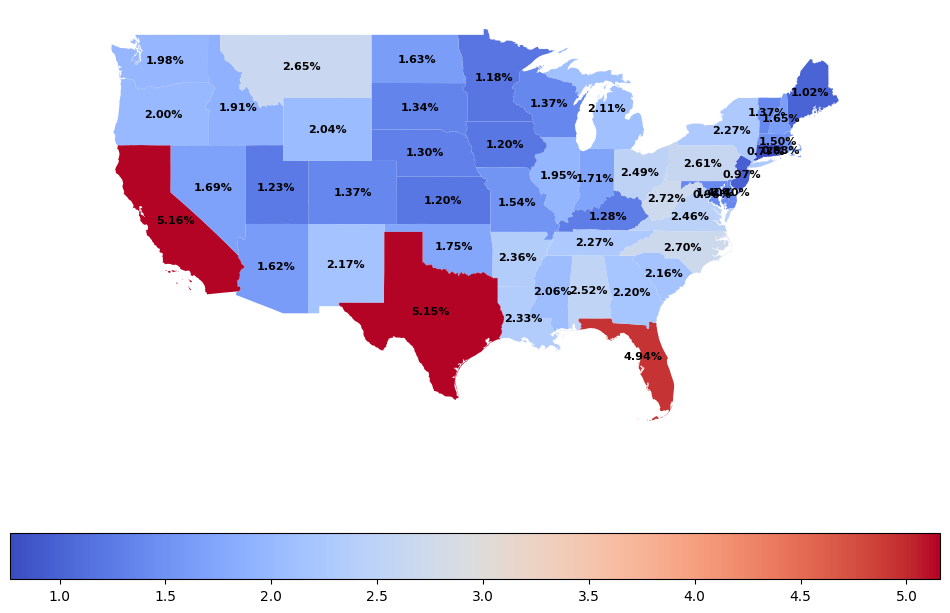

In [17]:
#2022 vet
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
#plot map
plot = vet_geo_22_conus.plot(column='percentage', cmap='coolwarm', legend=True, legend_kwds={'orientation': 'horizontal'}, ax=ax)

#add percentage values to show the source of the states color
#zip iterates over the centroid coordinates of the states and their corresponding percentage values, and ax.text displays the text on top 
for x, y, label in zip(vet_geo_22_conus.geometry.centroid.x, vet_geo_22_conus.geometry.centroid.y, vet_geo_22_conus['percentage']):
    ax.text(x, y, f'{label:.2f}%', fontsize=8, ha='center', va='center', color='black', weight='bold')

#drop axis
ax.set_axis_off()

#show 2023 heatmap
plt.show()

/tmp/ipykernel_31387/366362614.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(vet_geo_21_conus.geometry.centroid.x, vet_geo_21_conus.geometry.centroid.y, vet_geo_21_conus['percentage']):


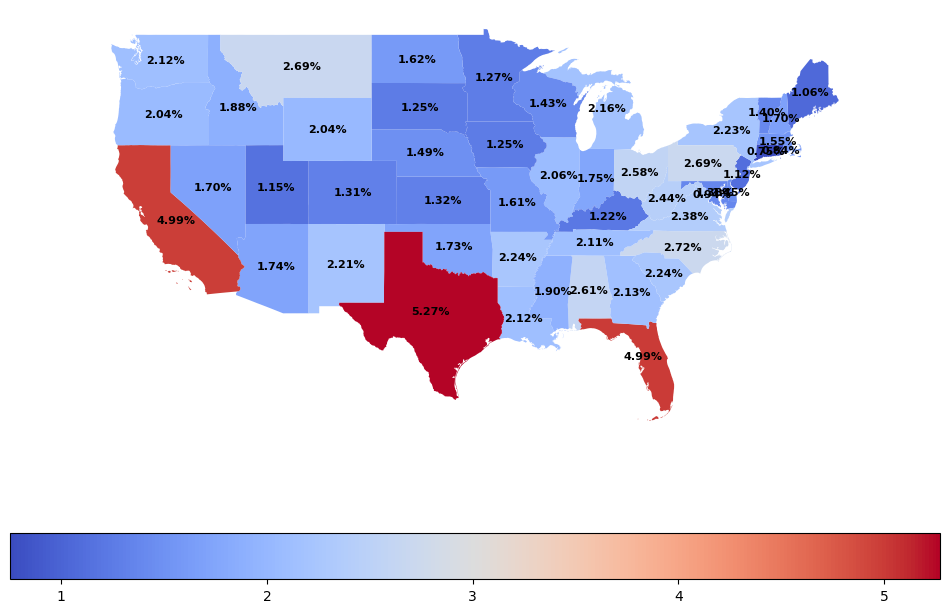

In [18]:
#2021 vet
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
#plot map
plot = vet_geo_21_conus.plot(column='percentage', cmap='coolwarm', legend=True, legend_kwds={'orientation': 'horizontal'}, ax=ax)

#add percentage values to show the source of the states color
#zip iterates over the centroid coordinates of the states and their corresponding percentage values, and ax.text displays the text on top 
for x, y, label in zip(vet_geo_21_conus.geometry.centroid.x, vet_geo_21_conus.geometry.centroid.y, vet_geo_21_conus['percentage']):
    ax.text(x, y, f'{label:.2f}%', fontsize=8, ha='center', va='center', color='black', weight='bold')

#drop axis
ax.set_axis_off()

#show 2023 heatmap
plt.show()

/tmp/ipykernel_31387/612205412.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(ad_geo_23_conus.geometry.centroid.x, ad_geo_23_conus.geometry.centroid.y, ad_geo_23_conus['percentage']):


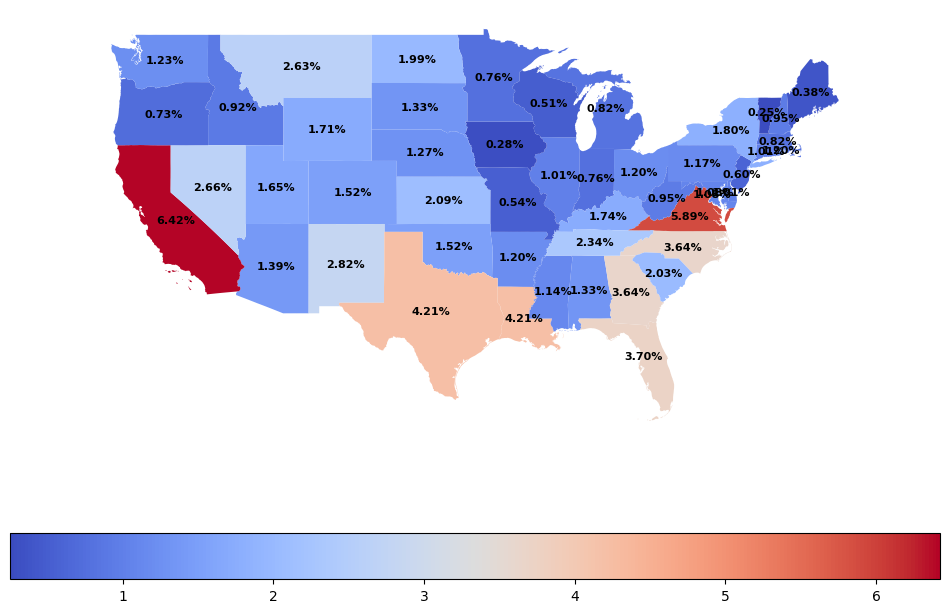

In [19]:
#2023 ad
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
#plot map
plot = ad_geo_23_conus.plot(column='percentage', cmap='coolwarm', legend=True, legend_kwds={'orientation': 'horizontal'}, ax=ax)

#add percentage values to show the source of the states color
#zip iterates over the centroid coordinates of the states and their corresponding percentage values, and ax.text displays the text on top 
for x, y, label in zip(ad_geo_23_conus.geometry.centroid.x, ad_geo_23_conus.geometry.centroid.y, ad_geo_23_conus['percentage']):
    ax.text(x, y, f'{label:.2f}%', fontsize=8, ha='center', va='center', color='black', weight='bold')

#drop axis
ax.set_axis_off()

#show 2023 heatmap
plt.show()

/tmp/ipykernel_31387/1187856287.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(ad_geo_22_conus.geometry.centroid.x, ad_geo_22_conus.geometry.centroid.y, ad_geo_22_conus['percentage']):


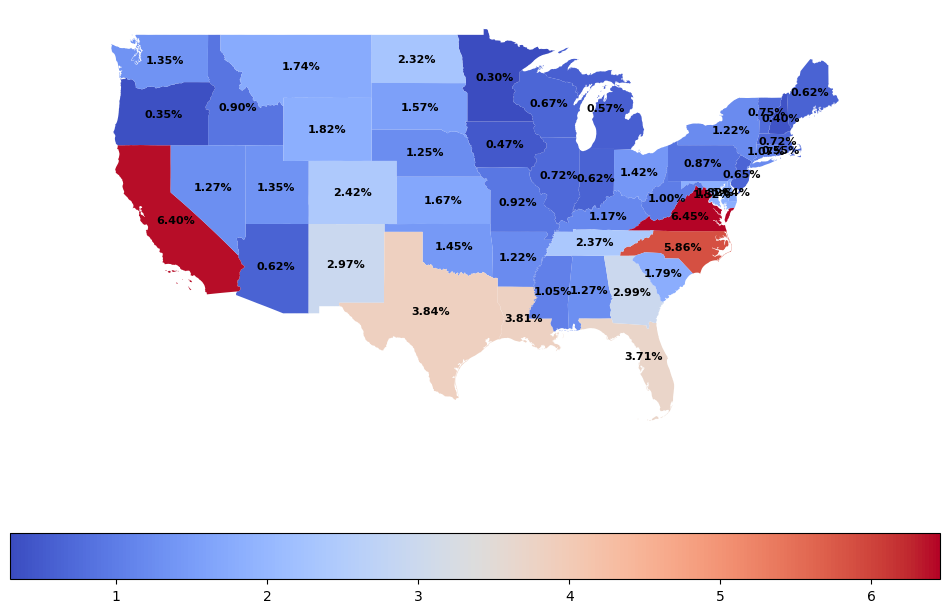

In [20]:
#2022 ad
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
#plot map
plot = ad_geo_22_conus.plot(column='percentage', cmap='coolwarm', legend=True, legend_kwds={'orientation': 'horizontal'}, ax=ax)

#add percentage values to show the source of the states color
#zip iterates over the centroid coordinates of the states and their corresponding percentage values, and ax.text displays the text on top 
for x, y, label in zip(ad_geo_22_conus.geometry.centroid.x, ad_geo_22_conus.geometry.centroid.y, ad_geo_22_conus['percentage']):
    ax.text(x, y, f'{label:.2f}%', fontsize=8, ha='center', va='center', color='black', weight='bold')

#drop axis
ax.set_axis_off()

#show 2023 heatmap
plt.show()

/tmp/ipykernel_31387/3410025298.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(ad_geo_21_conus.geometry.centroid.x, ad_geo_21_conus.geometry.centroid.y, ad_geo_21_conus['percentage']):


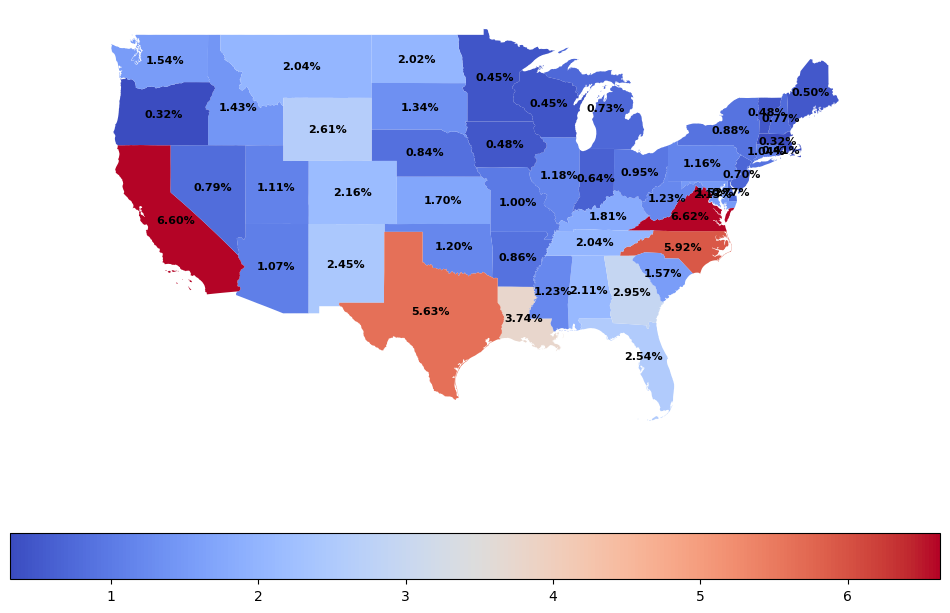

In [21]:
#2021 ad
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
#plot map
plot = ad_geo_21_conus.plot(column='percentage', cmap='coolwarm', legend=True, legend_kwds={'orientation': 'horizontal'}, ax=ax)

#add percentage values to show the source of the states color
#zip iterates over the centroid coordinates of the states and their corresponding percentage values, and ax.text displays the text on top 
for x, y, label in zip(ad_geo_21_conus.geometry.centroid.x, ad_geo_21_conus.geometry.centroid.y, ad_geo_21_conus['percentage']):
    ax.text(x, y, f'{label:.2f}%', fontsize=8, ha='center', va='center', color='black', weight='bold')

#drop axis
ax.set_axis_off()

#show 2023 heatmap
plt.show()